# Python Template File

### Import/export data files

Importing Files

In [ ]:
#Importing csv 
iris = pd.read_csv("C:/Users/iris.csv", sep=',' , header=0) # header 0: first line is header. if no header in the file then header=None

#Import txt
Credit_accept=pd.read_csv("Credit_Accept.txt", sep=',')

# import xlsx
bike = pd.read_excel("C:/Users/bike_rental_day.xlsx", sep=",", header=0)

# import url
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries=pd.read_csv(url)

#load a dataset from a package 
from sklearn.datasets import load_breast_cancer
BrCan = load_breast_cancer()

# Print data attributes
print("Outcome:" , BrCan.target)
print("Raw data:" , BrCan.data)
print("Data Description:", BrCan.DESCR)
print("Target Names:" , BrCan.target_names)
print("Feature Names:" , BrCan.feature_names)

# Load any sklearn data into pandas using a defined "sklearn_to_df" function
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(data=sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_boston = sklearn_to_df(datasets.load_boston())

Exporting Files

In [ ]:
#Exporting files to csv, txt, xlsx

df.to_csv("savedfile.csv", index=False) 
df.to_txt("savedfile.txt", index=False)

Reducing dataframe size so that it takes less memory space. This is for the case when you are having a really big data and you are using your personal PC which might cause memory issues when you run any action on the data if you dont have enough RAM memory 


In [ ]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [ ]:
df_new = reduce_mem_usage(df)
del df # deleting the original file to free up memory

### Data Profiling

Data File Attribute

In [ ]:
#Seeing top rows 
df.head()
df.head(20)

df.info()
df.nunique()  #number of unique values for each column
df.colA.value_counts()  # frequency table of the column "colA" in df table

# number of columns
print (len(df.columns))

#shape of data: #of columns and rows
print (df.shape)

# list of column names
print (df.columns)

# column types: numerical columns are "int32", "int64" or "float32", "float64" and categorical are "object"
print (df.dtypes)

#Pandas series
df['colA']    # this is a panda series
df[['colA']]  # this is a panda dataframe


Plotting 

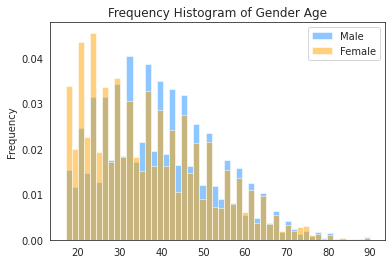

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#background theme
sns.set_style("white")

# Normalize
kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)


x1 = df.loc[df.sex =='Male', 'age']       # taking columns sex and age from df data
x2 = df.loc[df.sex =='Female', 'age']

plt.hist(x1, **kwargs, color='dodgerblue', label='Male')
plt.hist(x2, **kwargs, color='orange', label='Female')

plt.gca().set(title='Frequency Histogram of Gender Age', ylabel='Frequency')
plt.legend();

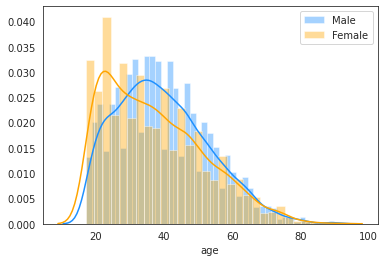

In [ ]:
kwargs = dict(hist_kws={'alpha':.9}, kde_kws={'linewidth':2})

#plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Male")
sns.distplot(x2, color="orange", label="Female")

#plt.xlim(15,)
plt.legend();

Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39ebf52668>,
      dtype=object)

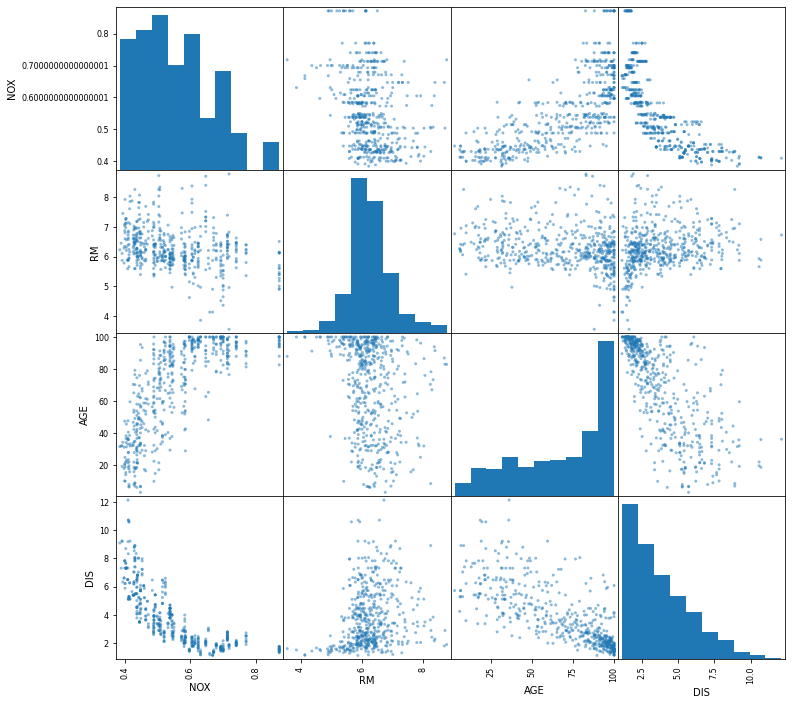

In [ ]:
# matrix plot 
scatter_matrix(df[df.columns[4:8]], figsize=(12,12)) # matrix plot of columns 4 to 7 of df data
# histogram
df[df.columns[4:8]].hist()

Interactive visualization using Altair package

In [3]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

alt.Chart(...)

In [4]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

In [5]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=False)

alt.Chart(...)

Create Summary Stats

In [ ]:
#This gives summary statistics for all the varibales 
df.describe() 
# or transpose the desc table
df.describe().transpose()

Missing Values Distribution 

In [ ]:
#This will give you a summary of the missing distribution across all variables 
df.isnull().sum()

#if you import a data you can give a list of string which indficates missing values and once the file imported automatically converts the values of the list in the data to NAN 
missing_values = ["n/a", "na", "--", "NaN"]
df = pd.read_csv("cs-training.csv", na_values = missing_values)
df.isnull().sum()

Correlation Matrix

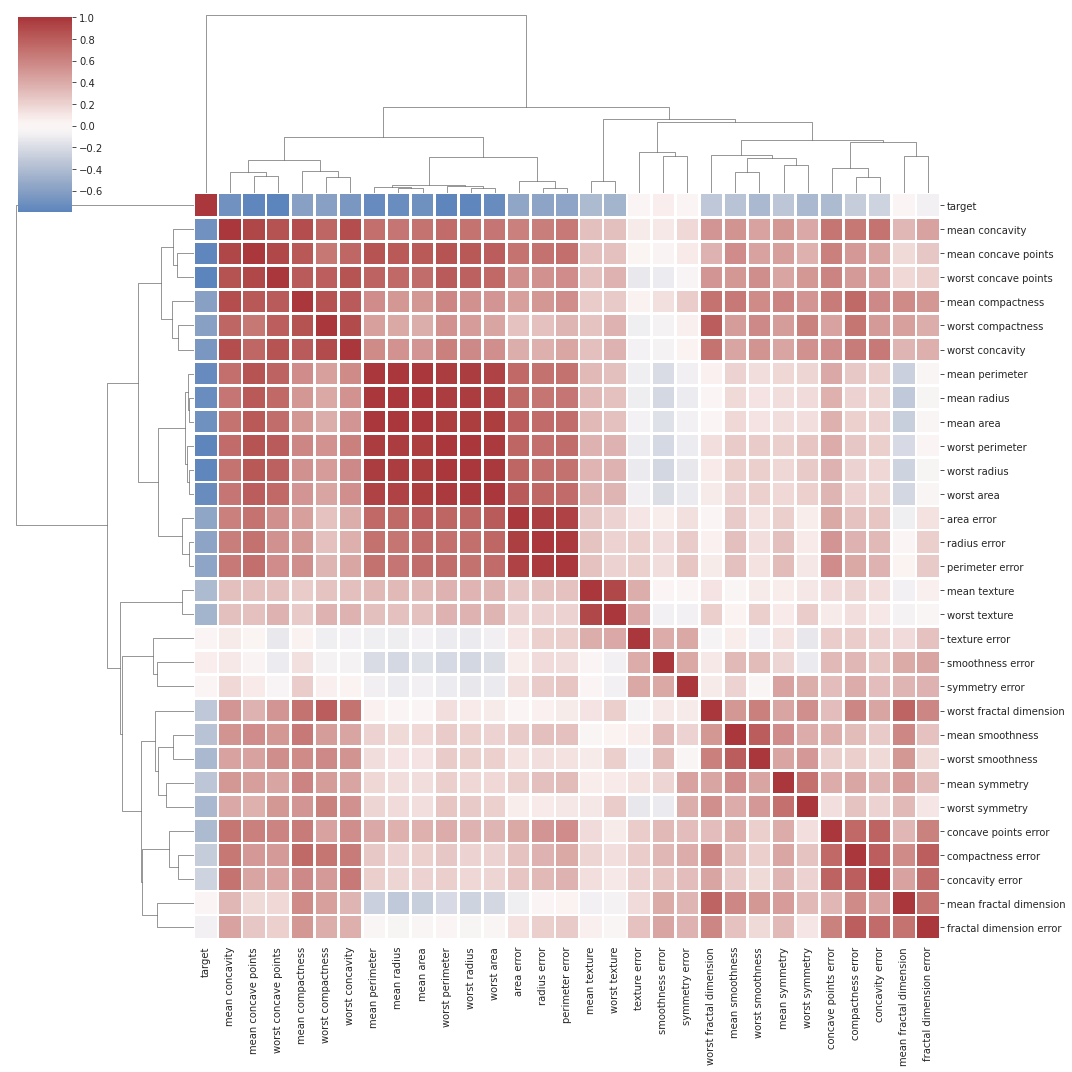

In [ ]:
#correlation matrix 
corrMatrix = df.corr()

#Specifying the correlation method 
corrMatrix2 = df.corr(method ='pearson')

#Sorting lowest to highest correlation 
c = df.corr(method ='pearson').abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

# Get a list of redundant pairs 
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
print(get_redundant_pairs(df))

# Get top absolute correlations  
def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
# printing the top 5 correlations
print(get_top_abs_correlations(df, 5))

#Correlation heat map 
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

#Correlation cluster map 
import seaborn as sns
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=1.75, figsize=(15, 15))

Almost all the steps above for data profiling can be done using the Pandas_profiling package in just one single line

In [ ]:
import pandas_profiling as pp

report = pp.ProfileReport(df)

# saving the report into an html file. You can find "your_report.html" file in the same location of your jupyter notebook 
report.to_file(output_file="your_report.html")

### Data wrangling

Change Variable Types and Rename Variables

In [ ]:
# Type of the columns
print(df.dtypes)

#converting one of the columns to object type variable (categorical)
df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].astype('object')
print(df.dtypes)

#Changing multiple variable types at once 
df = df.astype({'DebtRatio': 'float64', 'MonthlyIncome': 'float64',
               'NumberOfDependents': 'float64'}) 
print(df.dtypes)

# Renaming columns and keeping existing one 
df['default2']=df['SeriousDlqin2yrs'] #creating a copy of a column
df = df.rename(columns = {'SeriousDlqin2yrs':'Default', 'Glucose': 'glucose'})  #renaming a column

Different Types of Join 

In [ ]:
import pandas as pd
left = pd.DataFrame({'id':[1,2,3,4,5],'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
   {'id':[1,2,3,4,5],'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],'subject_id':['sub2','sub4','sub3','sub6','sub5']})

#Merging on a key 
output=pd.merge(left,right,on='id')

#Merging on multiple keys 
output2=pd.merge(left,right,on=['id','subject_id'])

#Left Join 
output3=pd.merge(left, right, on='subject_id', how='left')

#Right Join 
output4=pd.merge(left, right, on='subject_id', how='right')

#Outer Join 
output5=pd.merge(left, right, on='subject_id', how='outer')

#Inner Join 
output6=pd.merge(left, right, on='subject_id', how='inner')

Filtering

In [ ]:
csvData=pd.read_csv('csvData.csv')

#Filtering row by condition 
filter1=csvData[csvData['name']=='Brazil']

#Filtering row by more than one condition 
filter2=csvData[(csvData['pop2020'] > 50000) & (csvData['Density'] > 100)]

#Excluding this condition from the dataset 
filter3=csvData[csvData['name']!='China']

#Excluding multiple conditions from the dataset
filter4=csvData[(csvData['name']!= ('China','India') | (csvData['Density']!= 100)]
                        
#Rows in a list 
Listname = ['France', 'Italy', 'South Africa']
filter5=csvData[csvData.name.isin(Listname)]

Aggregate

In [ ]:
# mean of columns
df.mean()

# aggregate within each row
df.mean(axis='columns')

# sum of all numeric columns group by season
df.groupby('season').sum()

# sum of windspeed group by yr and season
df.groupby(['yr','season'])['windspeed'].sum().reset_index()

# summary stat of windspeed group by season
df.groupby('season')['windspeed'].describe()
df.groupby('season')['windspeed'].describe().unstack()

Deduplicate

In [ ]:
# removing duplicates if all columns have same values
df.drop_duplicates(keep = 'first')

# removing duplicates based on some of the columns
df.drop_duplicates(subset= ['yr','atemp'], keep = 'last')

Append

In [ ]:
# merging two DFs
result = pd.concat([DF1, DF2])

# merging two DFs with DF names as index
result = pd.concat([DF1, DF2], keys=['DF1','DF2'])

Pivot (long to wide)

In [ ]:
# pivot with one index
df_wide1 = df.pivot_table(index='season', columns='weather_sit', values='cnt', aggfunc='sum').reset_index()

# pivot with 2 index columns and no new columns to be created like upper case
df_wide2 = df.pivot_table(index=['season', 'weather_sit'], values='cnt', aggfunc='sum').reset_index()

Unpivot (wide to long)

In [ ]:
# all columns to get unpivoted
df_long1 = df_wide1.melt(id_vars=['season'], var_name='weather', value_name='Total_days')

# list of columns to get unpivoted using value_vars command
df_long2 = df_wide1.melt(id_vars=['season'], value_vars=['Clear','Mist + Cloud'], var_name='Weather', value_name='Total_days')


Subsetting data

In [ ]:
# subetting multiple columns using square brackets
df[['colA','colB','colC']]

# subetting multiple columns using a list
list=['colA','colB','colC']
df[list]

# drop multiple columns in a data
df.drop(['colA','colB'],axis=1)

# selecting rows based on row index using loc command
df.loc[0:10]    # this selects first 11 rows and all columns:  first row with index 0 upto 11th row with index 10
df.loc[0:10:2]  # select first row and stepping by 2 until row index 10, rows with index 0, 2, 4,... 10 will be selected
df.loc[10:]     # select rows from 10 to the end
df.loc[10::2]   # select rows from 11 to the end by 2
df.loc[[2,5]]   # selecting row with index 2 and 5

# selecting rows and columns simultanously using loc command
df.loc[row_selection, column_selection]
df.loc[0:10, ['colA','colB','colC']]  # selects first 11 rows with columns A-->C

# selecting rows and columns using iloc command
df.iloc[0:10, [1, 4]]   # selecting first 11 rows and columns 1 and 4
df.iloc[0:10, 5:8]      # selecting first 11 rows and columns 5 to 7

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Data Preprocessing and pipeline setup

Remvoing the variables/columns that have the following specifications 

 1. removing unique columns (columns with zero variance)
 2. removing variables with more than %X missing
 3. remvoing variables where the relative frequency of the most common category is greater than %X
 4. removing highly correlated variables
 5. remvoing other redundant variables

In [ ]:
# 1.columns with unique values - zero variance
one_value_cols = [col for col in df_train.columns if df_train[col].nunique() <= 1]

# 2.drop columns with more than X% missing data
many_null_cols = [col for col in df_train.columns if df_train[col].isnull().sum() / df_train.shape[0] > 0.9] #more than %90 missing

# 3.drop columns where the relative frequency of the most common category is greater than X%
big_top_value_cols = [col for col in df_train.columns if df_train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9] #greater than %90

# 4.drop highly correlated variables
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than X
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.80)] #greater than 0.8

# if you have a list of other columns to drop
other_cols = ['colA', 'colB', 'colx']

# creating the list of columns to be removed
cols_to_drop = list(set(one_value_cols + many_null_cols + big_top_value_cols + highly_correlated + other_cols))

#remvoing all the columns from data
df_train = df_train.drop(cols_to_drop, axis=1)


Setting up the pipeline for imputation and scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# selecting numeric features
numeric_features = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns

# selecting categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# create scaling and encoding pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # median imputation
    ('scaler', StandardScaler())])                  # standardization

# create scaling and encoding pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # replaces missing values with the word "missing" to be treated as a separate category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])   # ‘ignore’ means if an unknown category is encountered during transform/predict, the resulting one-hot encoded columns for this feature will be all zeros. 

#combine the preprocessing steps into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Modeling

### very quick modeling using lazypredict package
This will run 30 models on the data and sort them based on their performance. This will give us an idea about which models are good to start with for Hyperparameter tunning

In [8]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# classification problem

data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.7,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

# regression problem: very similar to classification just need to change 2 lines of code in the above

from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 30/30 [00:00<00:00, 36.97it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.98,0.98,0.98,0.98,0.01
LogisticRegression,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.01
PassiveAggressiveClassifier,0.97,0.97,0.97,0.97,0.01
XGBClassifier,0.97,0.97,0.97,0.97,0.04
LGBMClassifier,0.97,0.97,0.97,0.97,0.05
RandomForestClassifier,0.97,0.97,0.97,0.97,0.19
SGDClassifier,0.97,0.97,0.97,0.97,0.01
Perceptron,0.96,0.97,0.97,0.97,0.01


If you want to pass a list of models into the pipeline but without hyper parameter tuning (default settings) use the code below

In [ ]:
# list of models
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    
    pipe.fit(df_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

### **Hyperparamter Tunning**

### Case A) 
Fitting a single model like Random Forest using the pipeline as well as pefroming grid search for hyperparameter tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create pipeline with preprocessing and model steps and selecting RF as the model with defuakt hyperparamter settings
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
pipe.fit(df_train, y_train)
y_pred = pipe.predict(df_test)           #prediction of classes
y_prob = pipe.predict_proba(df_test)     #prediction of probabilities

# grid search for hyper paramtere tunning of the RF model
param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}

CV = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', verbose=0, n_jobs= 1) # scoring option: accuracy, f1, precision, recall, roc_auc
                  
CV.fit(df_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

### Case B) 
Hyperparameter tunning for multiple models in the pipeline. For this we use a defined function called: "EstimatorSelectionHelper" which does a grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params, scoring):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
        self.scoring = scoring

    def fit(self, X, y, cv=5, n_jobs=3, verbose=1, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=self.scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

now we list the models of interest and the range for each hyperparamteres of the models for HP tunning through a grid search  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# specify list of models to fit
models1 = {
    'Logitsic': LogisticRegression(random_state=10),
    'XGB': XGBClassifier(random_state=10),
    'lgb': LGBMClassifier(random_state=10),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=10),
    'RandomForestClassifier': RandomForestClassifier(random_state=10),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=10),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=10),
    'SVC': SVC(random_state=10)
}
# specify the hyper parameters for each model
params1 = {
    'Logitsic': {'penalty': ['elasticnet', 'none','l1','l2']},
    'XGB': {'learning_rate':[0.001, 0.01, 0.1, 0.3],'n_estimators': range(500,1000,100), 'max_depth': [5,6], 'gamma':[i/10.0 for i in range(0,5)], 'lambda':[i for i in range(1,10)], 'alpha':[i for i in range(0,10)], 'min_child_weight':[6,8,10,12] },
    'lgb': {'num_leaves': [200, 250, 300], 'min_child_samples': [100, 500], 'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4], 'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100], 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100] },
    'ExtraTreesClassifier': { 'n_estimators': [500, 1000] },
    'RandomForestClassifier': { 'n_estimators': [500, 1000] , 'criterion': ['gini','entropy'] ,'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [0.03, 0.05], 'min_samples_leaf':[0.01, 0.02], 'max_depth': [5,6]},
    'AdaBoostClassifier': { 'n_estimators': [500, 1000]},
    'GradientBoostingClassifier': { 'n_estimators': [500, 1000], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}
    ]
}

Running HP tunning on the above models

In [ ]:
helper1 = EstimatorSelectionHelper(models1, params1, scoring='roc_auc') #other metrics like f1, precision, recall or accuracy can be used

gridmodel = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', helper1)]) 
gridmodel.fit(X_train, y_train)
# getting a table which lists all the models and their HP values, sorted by the defined score in this case roc_auc
helper1.score_summary(sort_by='max_score')      #summary of all the models based on selected score

#X_train_preprocessed = preprocessor.fit_transform(X_train)
#helper1.fit(X_train_preprocessed, y_train)

### Validation

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt 

# Metrics on the test set
y_pred_test=pipe.predict(X_test)
cnf_matrix_test=metrics.confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix_test)
print('True Positives(TP) = ', cnf_matrix_test[0,0])
print('True Negatives(TN) = ', cnf_matrix_test[1,1])
print('False Positives(FP) = ', cnf_matrix_test[0,1])
print('False Negatives(FN) = ', cnf_matrix_test[1,0])
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("AUC:", roc_auc_score(y_test, y_pred_test))
print("f1:", f1_score(y_test, y_pred_test))

# AUC plot
y_prob_test=pipe.predict_proba(X_test)[::,1] # to get predicted probabilities
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prob_test)
auc = metrics.roc_auc_score(y_test, y_prob_test)
plt.plot(fpr,tpr,label="test data auc="+str(auc))
plt.legend(loc=4)
plt.show()



once the top model is selected, we can refit the champion model on the whole data 

In [ ]:
#Refitting the top model from the helper1 on the train
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       #('pca', PCA(n_components=2)),
                      ('classifier', LGBMClassifier(num_leaves=200, min_child_samples=100, min_child_weight=1e-5, reg_alpha=1e-1, reg_lambda= 100 ))])
pipe.fit(X, y)

# CATBOOST
# from catboost import CatBoostClassifier
# model=CatBoostClassifier(iterations=100, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)
# model.fit(X_train, y_train, eval_set=(X_test, y_test),plot=True)

## AutoML using auto-sklearn package

Auto-sklrean will try different models as well as preprocessing steps and will output and sort the results based on the user specified metric. Therefore the user can just feed the raw data to the package without the need of preprocessing it.

Please note that auto-sklearn might not run in a jupyter notebook on Windows. you can try google colab to run this or you can run it on a unix environment. For more info refer to 
https://automl.github.io/auto-sklearn/master/installation.html#installation

In [ ]:
# setting up auto sklearn in colab
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import autosklearn.classification

In [ ]:
#Load dataset
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(X, y, random_state=1)

In [ ]:
#Build classifier
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    disable_evaluator_output=False,
    resampling_strategy='holdout',
    #include_preprocessors=['pca'], if you autosklearn to use pca as preprocessor
    metric=autosklearn.metrics.f1,
    metric=autosklearn.metrics.f1,
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

In [ ]:
#Evaluating the autosklearn model
predictions = automl.predict(X_test)
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())
print("Accuracy score:{}".format(
    sklearn.metrics.accuracy_score(y_test, predictions))
)

auto-sklearn results:
  Dataset name: breast_cancer
  Metric: f1
  Best validation score: 0.988889
  Number of target algorithm runs: 39
  Number of successful target algorithm runs: 38
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

Accuracy score:0.951048951048951


PipelineProfiler can be used to explore the models produced by Auto-Sklearn. Below is an image of what you get when you run pipelineprofiler.

In [ ]:
#Autosklearn profiler
! pip install PipelineProfiler
import PipelineProfiler
profiler_data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

<img src="https://github.com/sfallahpour/Python-Template-for-ML/blob/master/images/image.PNG?raw=true">

In [ ]:
PipelineProfiler.get_exported_pipelines()